In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('C:/Users/andre/Desktop/ECGR HW/ECGR 4105/D3.csv')
df.head()# To get first n rows from the dataset default value of n is 5
M=len(df)
M

100

In [10]:
X = df.values[:, 0]
K = df.values[:, 1]
Z = df.values[:, 2]
Y = df.values[:, 3]
m = len(Y)
print('X='   ,X[:99])
print('K='  ,K[:99])
print('Z=' ,Z[:99])
print('Y='  ,Y[:99])
print('m=' ,m)

X= [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.595

Text(0, 0.5, 'Profit in $10,000s')

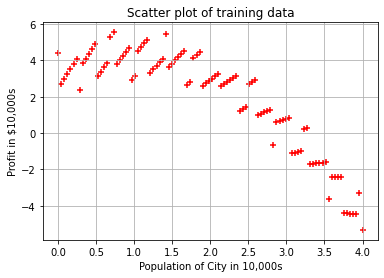

In [11]:
plt.scatter(X,Y,color='red',marker='+')
plt.grid()
plt.title('Scatter plot of training data')
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Text(0, 0.5, 'Profit in $10,000s')

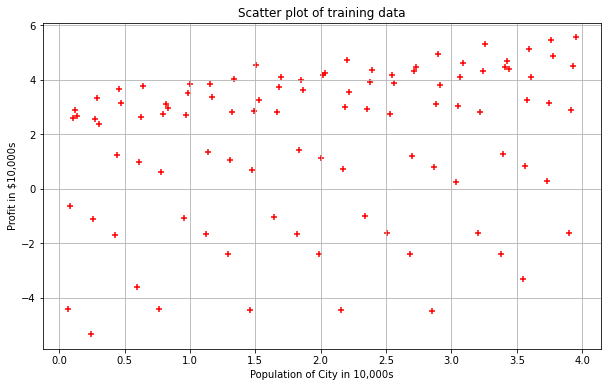

In [12]:
plt.scatter(K,Y,color='red',marker='+')
plt.grid()
plt.title('Scatter plot of training data')
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Text(0, 0.5, 'Profit in $10,000s')

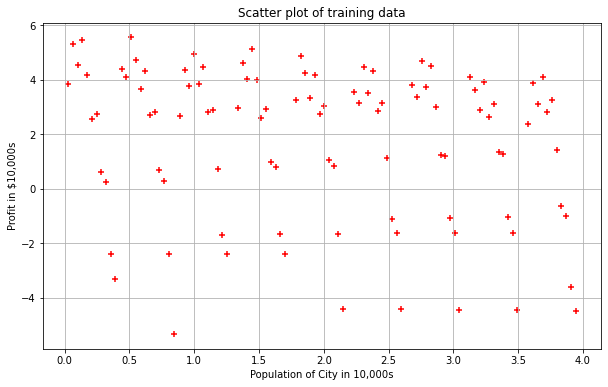

In [13]:
plt.scatter(Z,Y,color='red',marker='+')
plt.grid()
plt.title('Scatter plot of training data')
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [14]:
p = np.ones((m,1))
p[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [15]:
X1 = X.reshape(m,1)
X2= K.reshape(m,1)
X3 = Z.reshape(m,1)

X1[:10]
X2[:10]
X3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [16]:
X=np.hstack((p,X1))
X[:5]    

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [17]:
theta=np.zeros(2)
theta         

array([0., 0.])

In [18]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [19]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)   

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [20]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [21]:
theta = [0.,0.]
iterations = 1500;
alpha = 0.01;   

In [22]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history) 

Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


Text(0.5, 1.0, 'Scatter plot of training data')

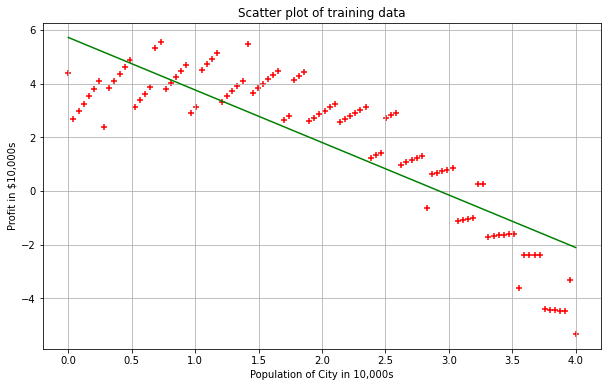

In [23]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

Text(0.5, 1.0, 'Convergence of gradient descent')

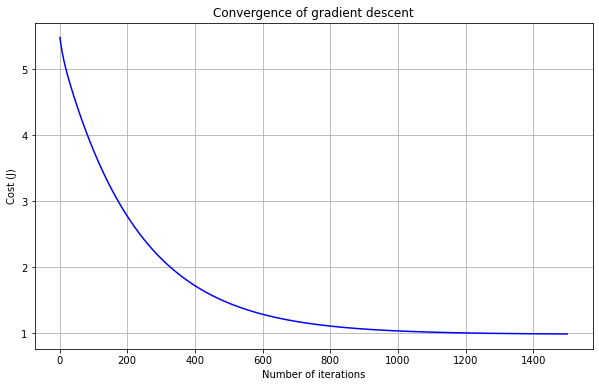

In [24]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [25]:
#Problem 1
#Question3
#the first trial X(0) has the lower loss function 

In [26]:
#Problem 1
#Question4
#The smaller the learning rate the more gradual the slope is (slower to learn)
#The larger the learning rate is, the steaper the slope is (faster to learn)
#However, if the learnng rate is too large (ie. 0.5) then the curve breaks and no useful data can be reasonable collected.

In [27]:
X=np.hstack((p,X2))
X[:5] 

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [28]:
theta=np.zeros(2)
theta   

array([0., 0.])

In [29]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [30]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [31]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [32]:
theta = [0.,0.]
iterations = 1500;
alpha = 0.01;   

In [33]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history) 

Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


Text(0.5, 1.0, 'Scatter plot of training data')

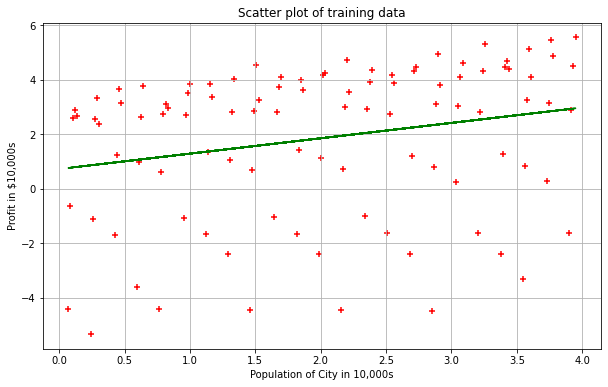

In [34]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

Text(0.5, 1.0, 'Convergence of gradient descent')

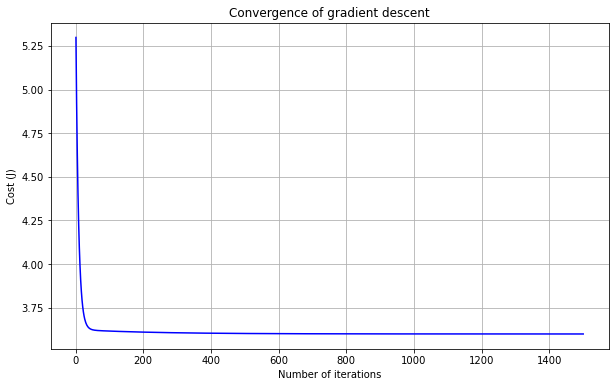

In [35]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [36]:
X=np.hstack((p,X3))
X[:5] 

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [37]:
theta=np.zeros(2)
theta   

array([0., 0.])

In [38]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [39]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [40]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,Y,theta)
    
    return theta,cost_history

In [41]:
theta = [0.,0.]
iterations = 1500;
alpha = 0.01; 

In [42]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


Text(0.5, 1.0, 'Scatter plot of training data')

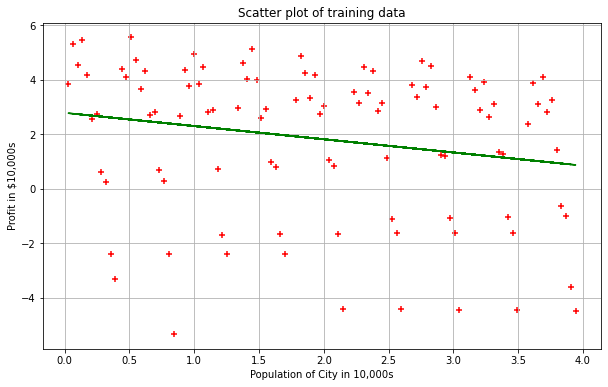

In [43]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

Text(0.5, 1.0, 'Convergence of gradient descent')

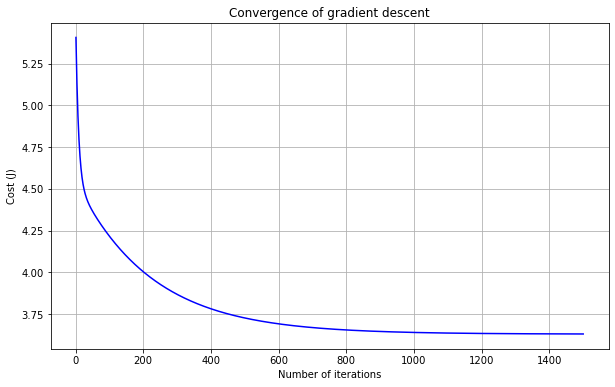

In [44]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [45]:
#Problem 2 Plot all on the same plot

In [46]:
X=np.hstack((p,X1,X2,X3))
X[:10] 

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939],
       [1.        , 0.2020202 , 2.91474747, 2.68242424],
       [1.        , 0.24242424, 3.60969697, 3.13090909],
       [1.        , 0.28282828, 0.30464646, 3.57939394],
       [1.        , 0.32323232, 0.99959596, 0.02787879],
       [1.        , 0.36363636, 1.69454546, 0.47636364]])

In [47]:
theta=np.zeros(2)
theta   

array([0., 0.])

In [48]:
def compute_cost(X,Y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,Y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [49]:
cost=compute_cost(X,Y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost) 

ValueError: shapes (100,4) and (2,) not aligned: 4 (dim 1) != 2 (dim 0)

In [ ]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(A,Y,theta)
    
    return theta,cost_history

In [3]:
theta = [0., 0., 0.,0.,]
iterations = 1500;
alpha = 0.01; 

In [5]:
theta, cost_history = gradient_descent(X,Y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

NameError: name 'gradient_descent' is not defined

In [6]:
plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

NameError: name 'plt' is not defined

In [7]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

NameError: name 'plt' is not defined